In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag

platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install torch_nightly -f https://download.pytorch.org/whl/nightly/{accelerator}/torch_nightly.html
!pip install fastai

import torch

print(torch.__version__)
print(torch.cuda.is_available())
print(torch.backends.cudnn.enabled)

In [0]:
import fastai
print(fastai.__version__)
from fastai import *
from fastai.vision import *


1.0.26


In [0]:
!ls

Kather_texture_2016_image_tiles_5000.zip  sample_data


In [0]:
!unzip Kather_texture_2016_image_tiles_5000.zip

In [0]:
!ls

Kather_texture_2016_image_tiles_5000	  sample_data
Kather_texture_2016_image_tiles_5000.zip


In [0]:


from fastai import *
from fastai.vision import *

In [0]:
!ls

Kather_texture_2016_image_tiles_5000	  sample_data
Kather_texture_2016_image_tiles_5000.zip


In [0]:
path = 'Kather_texture_2016_image_tiles_5000' 
tfms=get_transforms()

In [0]:
data = (ImageItemList.from_folder(path)
        .random_split_by_pct()
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch())


In [0]:

learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit(2)

Total time: 01:16
epoch  train_loss  valid_loss  accuracy
1      0.525818    0.274136    0.904000  (00:39)
2      0.361838    0.264670    0.907000  (00:37)



In [0]:
interp = ClassificationInterpretation.from_learner(learn)

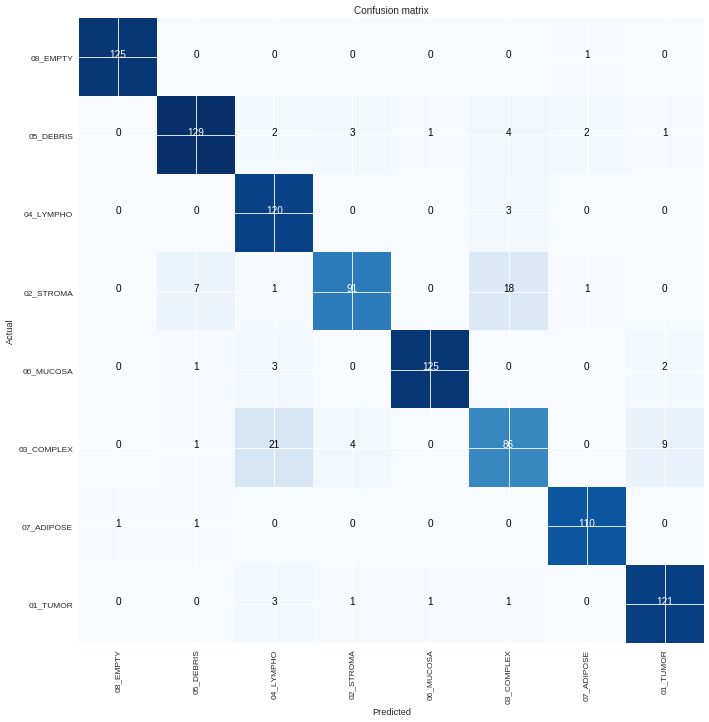

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
%%timeit
learn.unfreeze()
learn.fit_one_cycle(3, slice(1e-5,3e-4), pct_start=0.05)

Total time: 01:51
epoch  train_loss  valid_loss  accuracy
1      0.113276    0.135325    0.955000  (00:37)
2      0.107486    0.127779    0.963000  (00:37)
3      0.084120    0.120483    0.965000  (00:36)

1 loop, best of 3: 1min 51s per loop


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

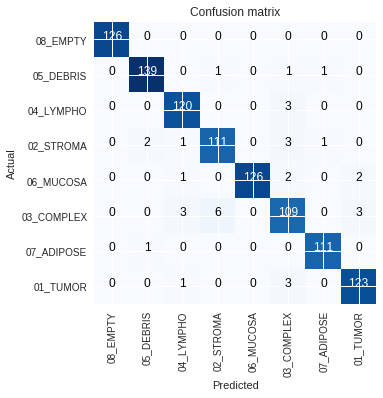

In [0]:
interp.plot_confusion_matrix()